In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform
import pickle
import pandas as pd
import random

In [2]:
trainingData = {'feature': [],
                'label': []}

baseDir = os.path.join(os.getcwd(), 'Training_Images')


In [3]:

for i, folder in enumerate(os.listdir(baseDir)):
    folderPath = os.path.join(baseDir, folder)
    for file in os.listdir(folderPath):
        if file.endswith('ppm'):
            filePath = os.path.join(folderPath, file)
            image = np.array(io.imread(filePath))
            image = transform.resize(image, (32, 32), mode='reflect')
            trainingData['feature'].append(image)
            trainingData['label'].append(i)


In [4]:
df = pd.read_csv('trafficsignclassifier.csv')
xTrain, yTrain = trainingData['feature'], trainingData['label']
print(len(yTrain))


39209


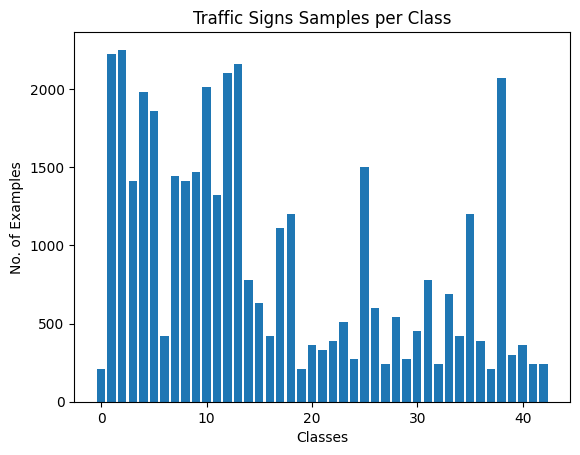

In [5]:
classes, classIndeces, classCounts = np.unique(yTrain, return_index=True, return_counts=True)

plt.bar(classes, classCounts)
plt.title('Traffic Signs Samples per Class')
plt.xlabel('Classes')
plt.ylabel('No. of Examples')
plt.show()

Class 0: Speed limit (20km/h)       210 samples.


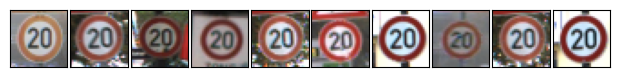

------------------------------------------------------------------------------------
Class 1: Speed limit (30km/h)       2220 samples.


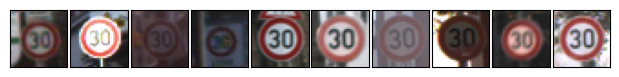

------------------------------------------------------------------------------------
Class 2: Speed limit (50km/h)       2250 samples.


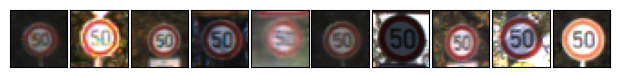

------------------------------------------------------------------------------------
Class 3: Speed limit (60km/h)       1410 samples.


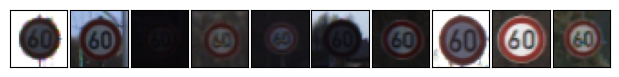

------------------------------------------------------------------------------------
Class 4: Speed limit (70km/h)       1980 samples.


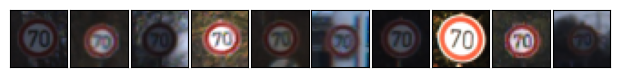

------------------------------------------------------------------------------------
Class 5: Speed limit (80km/h)       1860 samples.


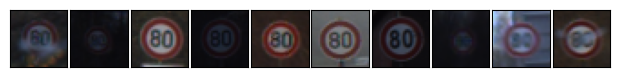

------------------------------------------------------------------------------------
Class 6: End of speed limit (80km/h)       420 samples.


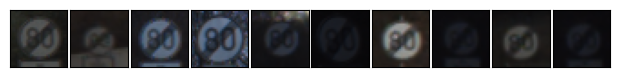

------------------------------------------------------------------------------------
Class 7: Speed limit (100km/h)       1440 samples.


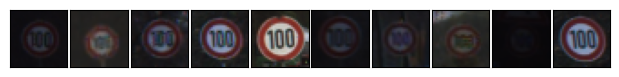

------------------------------------------------------------------------------------
Class 8: Speed limit (120km/h)       1410 samples.


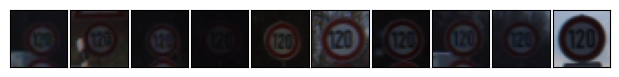

------------------------------------------------------------------------------------
Class 9: No passing       1470 samples.


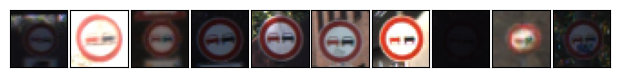

------------------------------------------------------------------------------------
Class 10: No passing for vechiles over 3.5 metric tons       2010 samples.


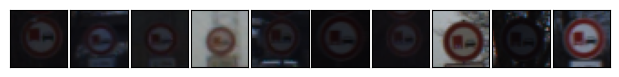

------------------------------------------------------------------------------------
Class 11: Right-of-way at the next intersection       1320 samples.


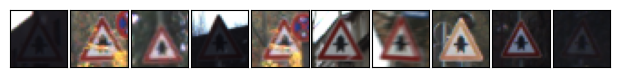

------------------------------------------------------------------------------------
Class 12: Priority road       2100 samples.


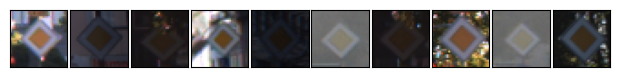

------------------------------------------------------------------------------------
Class 13: Yield       2160 samples.


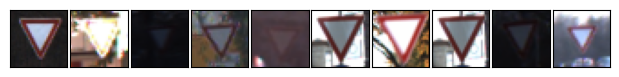

------------------------------------------------------------------------------------
Class 14: Stop       780 samples.


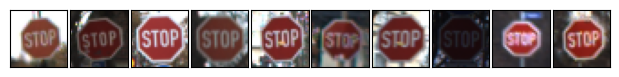

------------------------------------------------------------------------------------
Class 15: No vechiles       630 samples.


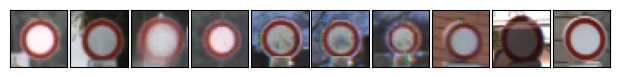

------------------------------------------------------------------------------------
Class 16: Vechiles over 3.5 metric tons prohibited       420 samples.


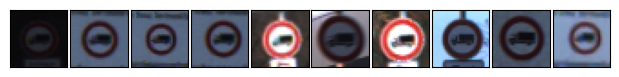

------------------------------------------------------------------------------------
Class 17: No entry       1110 samples.


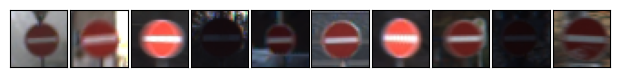

------------------------------------------------------------------------------------
Class 18: General caution       1200 samples.


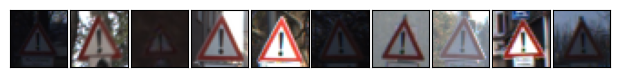

------------------------------------------------------------------------------------
Class 19: Dangerous curve to the left       210 samples.


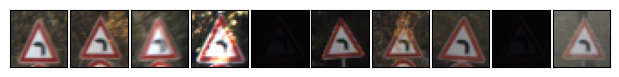

------------------------------------------------------------------------------------
Class 20: Dangerous curve to the right       360 samples.


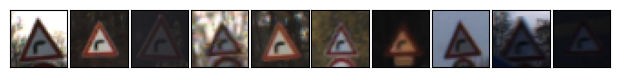

------------------------------------------------------------------------------------
Class 21: Double curve       330 samples.


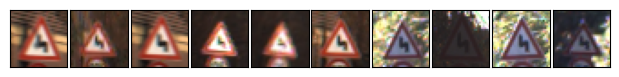

------------------------------------------------------------------------------------
Class 22: Bumpy road       390 samples.


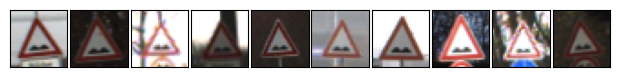

------------------------------------------------------------------------------------
Class 23: Slippery road       510 samples.


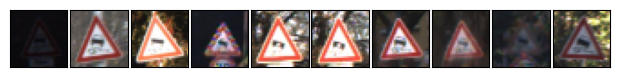

------------------------------------------------------------------------------------
Class 24: Road narrows on the right       270 samples.


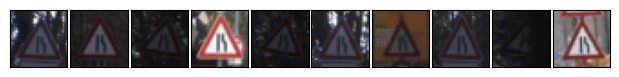

------------------------------------------------------------------------------------
Class 25: Road work       1500 samples.


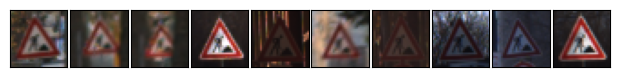

------------------------------------------------------------------------------------
Class 26: Traffic signals       600 samples.


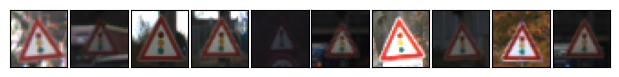

------------------------------------------------------------------------------------
Class 27: Pedestrians       240 samples.


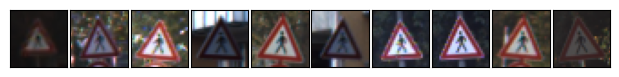

------------------------------------------------------------------------------------
Class 28: Children crossing       540 samples.


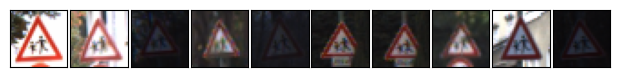

------------------------------------------------------------------------------------
Class 29: Bicycles crossing       270 samples.


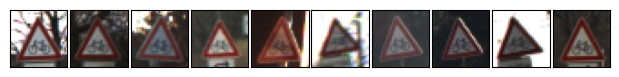

------------------------------------------------------------------------------------
Class 30: Beware of ice/snow       450 samples.


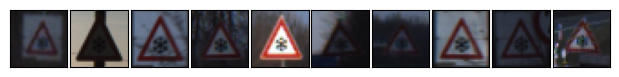

------------------------------------------------------------------------------------
Class 31: Wild animals crossing       780 samples.


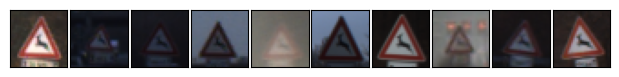

------------------------------------------------------------------------------------
Class 32: End of all speed and passing limits       240 samples.


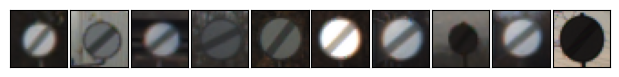

------------------------------------------------------------------------------------
Class 33: Turn right ahead       689 samples.


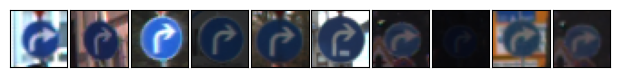

------------------------------------------------------------------------------------
Class 34: Turn left ahead       420 samples.


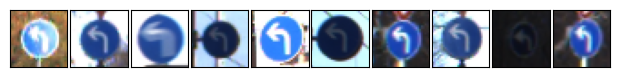

------------------------------------------------------------------------------------
Class 35: Ahead only       1200 samples.


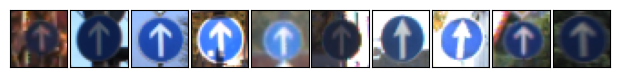

------------------------------------------------------------------------------------
Class 36: Go straight or right       390 samples.


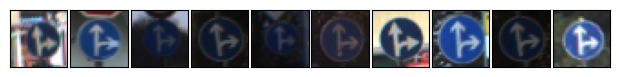

------------------------------------------------------------------------------------
Class 37: Go straight or left       210 samples.


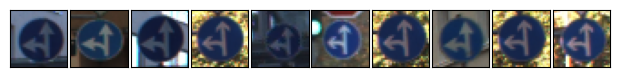

------------------------------------------------------------------------------------
Class 38: Keep right       2070 samples.


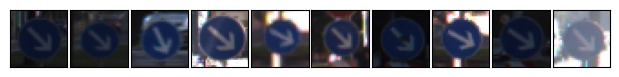

------------------------------------------------------------------------------------
Class 39: Keep left       300 samples.


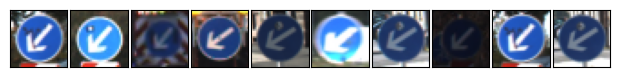

------------------------------------------------------------------------------------
Class 40: Roundabout mandatory       360 samples.


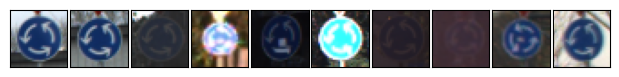

------------------------------------------------------------------------------------
Class 41: End of no passing       240 samples.


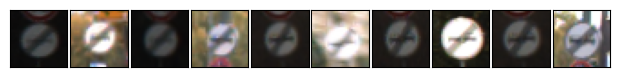

------------------------------------------------------------------------------------
Class 42: End of no passing by vechiles over 3.5 metric tons       240 samples.


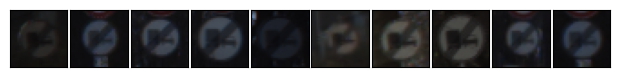

------------------------------------------------------------------------------------


In [9]:
for c, index, count in zip(classes, classIndeces, classCounts):
    print(f"Class {c}: {df['signNames'][c]}       {count} samples.")
    fig = plt.figure(figsize=(6, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    randomSample = random.sample(range(index, index + count - 1), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(xTrain[randomSample[i]])
    plt.show()
    print('------------------------------------------------------------------------------------')




In [14]:
with open('trainData.pkl', 'wb') as pklfile:
    pickle.dump(trainingData, pklfile)

In [16]:
def loadPickle(file, column):
    with open(file, 'rb') as pklfile:
        data = pickle.load(pklfile)
    return tuple(map(lambda c: data[c], column))

In [18]:
xTrain, yTrain = loadPickle('trainData.pkl', ['feature', 'label'])
print(len(xTrain))
print(len(yTrain))


39209
39209


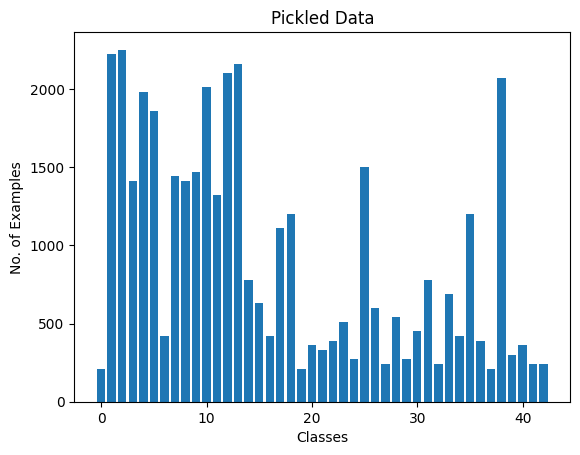

In [20]:
classes, classIndeces, classCount = np.unique(yTrain, return_index=True, return_counts=True)

plt.bar(classes, classCount)
plt.title('Pickled Data')
plt.xlabel('Classes')
plt.ylabel('No. of Examples')
plt.show()

Class 0: Speed limit (20km/h)                    210 samples


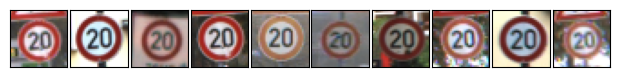

Class 1: Speed limit (30km/h)                    2220 samples


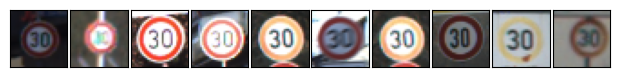

Class 2: Speed limit (50km/h)                    2250 samples


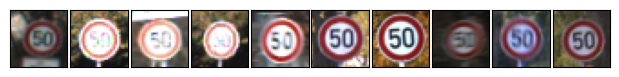

Class 3: Speed limit (60km/h)                    1410 samples


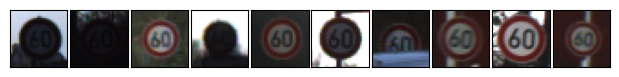

Class 4: Speed limit (70km/h)                    1980 samples


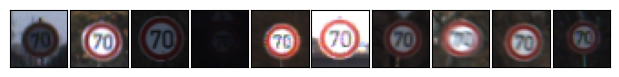

Class 5: Speed limit (80km/h)                    1860 samples


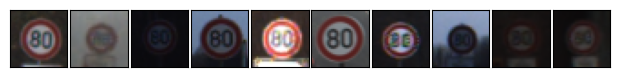

Class 6: End of speed limit (80km/h)                    420 samples


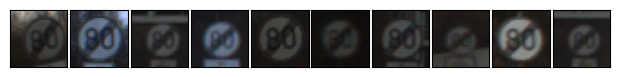

Class 7: Speed limit (100km/h)                    1440 samples


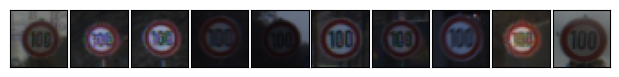

Class 8: Speed limit (120km/h)                    1410 samples


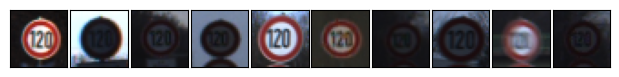

Class 9: No passing                    1470 samples


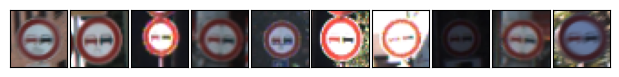

Class 10: No passing for vechiles over 3.5 metric tons                    2010 samples


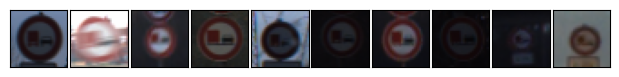

Class 11: Right-of-way at the next intersection                    1320 samples


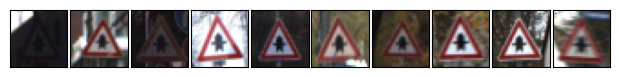

Class 12: Priority road                    2100 samples


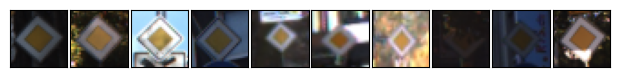

Class 13: Yield                    2160 samples


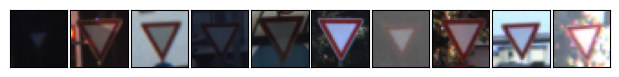

Class 14: Stop                    780 samples


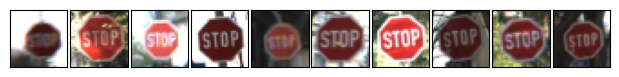

Class 15: No vechiles                    630 samples


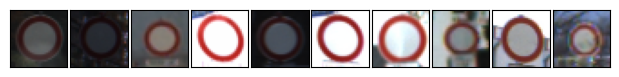

Class 16: Vechiles over 3.5 metric tons prohibited                    420 samples


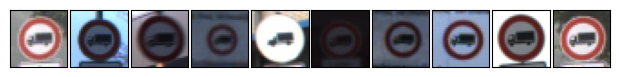

Class 17: No entry                    1110 samples


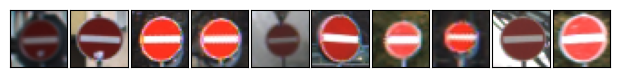

Class 18: General caution                    1200 samples


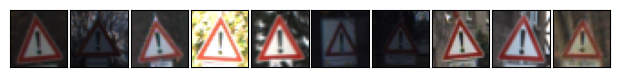

Class 19: Dangerous curve to the left                    210 samples


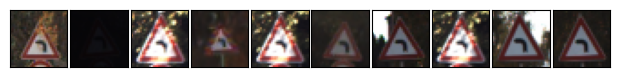

Class 20: Dangerous curve to the right                    360 samples


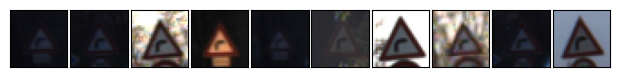

Class 21: Double curve                    330 samples


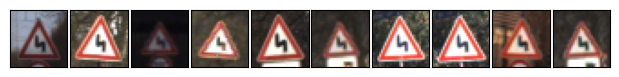

Class 22: Bumpy road                    390 samples


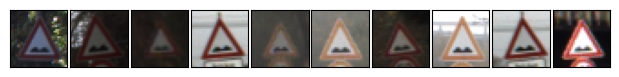

Class 23: Slippery road                    510 samples


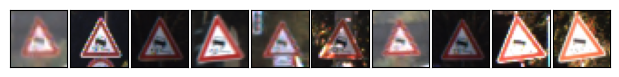

Class 24: Road narrows on the right                    270 samples


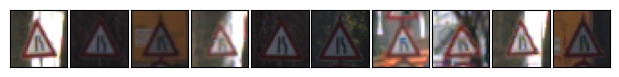

Class 25: Road work                    1500 samples


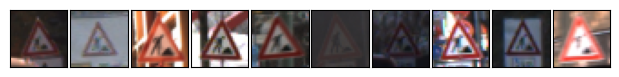

Class 26: Traffic signals                    600 samples


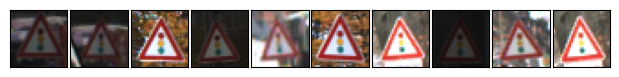

Class 27: Pedestrians                    240 samples


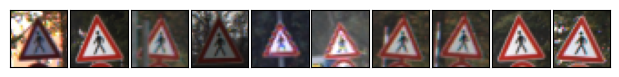

Class 28: Children crossing                    540 samples


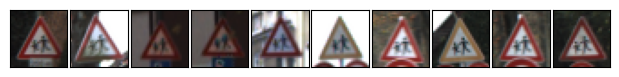

Class 29: Bicycles crossing                    270 samples


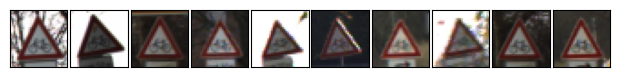

Class 30: Beware of ice/snow                    450 samples


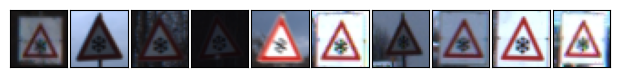

Class 31: Wild animals crossing                    780 samples


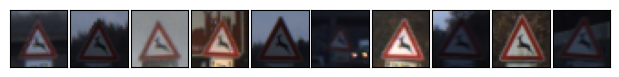

Class 32: End of all speed and passing limits                    240 samples


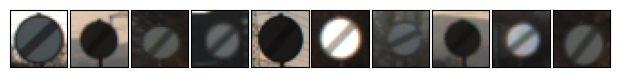

Class 33: Turn right ahead                    689 samples


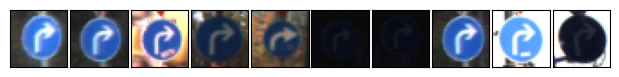

Class 34: Turn left ahead                    420 samples


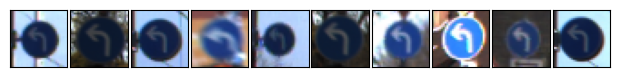

Class 35: Ahead only                    1200 samples


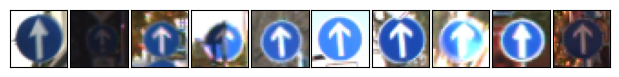

Class 36: Go straight or right                    390 samples


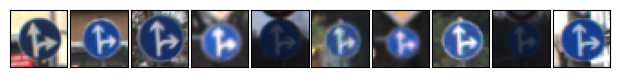

Class 37: Go straight or left                    210 samples


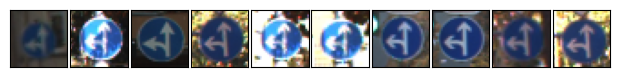

Class 38: Keep right                    2070 samples


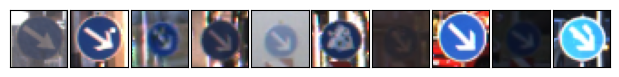

Class 39: Keep left                    300 samples


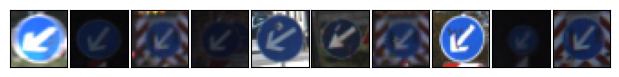

Class 40: Roundabout mandatory                    360 samples


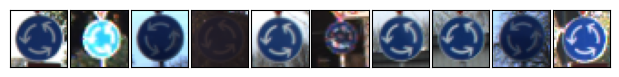

Class 41: End of no passing                    240 samples


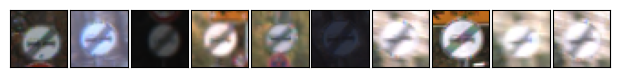

Class 42: End of no passing by vechiles over 3.5 metric tons                    240 samples


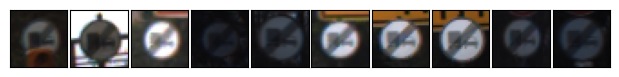

In [22]:
for c, index, count in zip(classes, classIndeces, classCount):
    print(f'Class {c}: {df['signNames'][c]}                    {count} samples')
    fig = plt.figure(figsize=(6, 1))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    randomSample = random.sample(range(index, index + count), 10)
    for i in range(10):
        axis = fig.add_subplot(1, 10, i + 1, xticks=[], yticks=[])
        axis.imshow(xTrain[randomSample[i]])
    plt.show()

In [34]:
print(np.ones((3, 3)))


[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
